# Admit or not
## Final Project of CS767-Machine Learning
## by Zicheng Wang

In [1]:
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import random
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Prepare and clean the date

In [2]:
df = pd.read_csv(
    "C:/Users/wangz/OneDrive/BU/2019Spring/MET-CS767-Machine Learning/Project/Demo/Graduate Admissions/Admission_Predict.csv", sep=",")
serialNo = df["Serial No."].values
df.drop(["Serial No."], axis=1, inplace=True)
df = df.rename(columns={'Chance of Admit ': 'Chance of Admit'})
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"], axis=1)
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


### splits the data into random train (80%) and test (20%) subsets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20)
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
240,296,101,1,2.5,3.0,7.68,0
175,320,111,4,4.5,3.5,8.87,1
481,323,107,4,3.0,2.5,8.48,1
360,322,110,3,4.0,5.0,8.64,1
471,311,103,3,2.0,4.0,8.09,0


In [4]:
# Normalization
scalerX = preprocessing.MinMaxScaler(feature_range=(0, 1))
# scalerX=preprocessing.Normalizer()
# scalerX = preprocessing.StandardScaler()
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])
x_train.head()

C:\wzc\Tool\MiniConda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\wzc\Tool\MiniConda\envs\ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\wzc\Tool\MiniConda\envs\ml\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\wzc\Tool\MiniConda\envs\ml\lib\site-packages\ipykernel_l

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
240,0.12,0.321429,0.00,0.375,0.500,0.282958,0.0
175,0.60,0.678571,0.75,0.875,0.625,0.665595,1.0
481,0.66,0.535714,0.75,0.500,0.375,0.540193,1.0
360,0.64,0.642857,0.50,0.750,1.000,0.591640,1.0
471,0.42,0.392857,0.50,0.250,0.750,0.414791,0.0


### Perform Linear Regression

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Perform Neural Network

#### Define the Neural Network model

In [6]:
def NNmodel():
    model = Sequential()
    model.add(Dense(6, input_dim=len(x_train.keys()), activation='elu'))
    model.add(Dense(3, activation='elu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',
                  optimizer='RMSprop', metrics=['mae', 'mse'])
    return model

model = NNmodel()

Instructions for updating:
Colocations handled automatically by placer.


#### Start training Neural Network model

In [7]:
history = model.fit(x_train, y_train, epochs=20, batch_size=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
400/400 [==============================] - 1s 1ms/step - loss: 0.1345 - mean_absolute_error: 0.2460 - mean_squared_error: 0.1345
Epoch 2/20
400/400 [==============================] - 0s 570us/step - loss: 0.0058 - mean_absolute_error: 0.0574 - mean_squared_error: 0.0058
Epoch 3/20
400/400 [==============================] - 0s 703us/step - loss: 0.0043 - mean_absolute_error: 0.0483 - mean_squared_error: 0.0043
Epoch 4/20
400/400 [==============================] - 0s 640us/step - loss: 0.0040 - mean_absolute_error: 0.0456 - mean_squared_error: 0.0040
Epoch 5/20
400/400 [==============================] - 0s 638us/step - loss: 0.0040 - mean_absolute_error: 0.0446 - mean_squared_error: 0.0040
Epoch 6/20
400/400 [==============================] - 0s 524us/step - loss: 0.0038 - mean_absolute_error: 0.0443 - mean_squared_error: 0.0038
Epoch 7/20
400/400 [==============================] - 0s 623us/step - loss: 0.0039 - mean_absolute_err

#### Plot the curve of loss

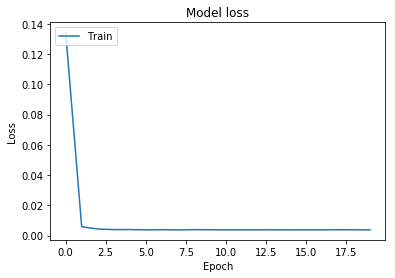

In [8]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Test the predict result accurancy

#### R square score of Linear Regression and Neural Network

In [9]:
y_test_lr = lr.predict(x_test)
print("r_square score of LR: ", r2_score(y_test, y_test_lr))
y_test_nn = model.predict(x_test)
print("r_square score of NN: ", r2_score(y_test, y_test_nn))

r_square score of LR:  0.8116290293119448
r_square score of NN:  0.7967727487365126


#### Random new input and compare two predictions

In [10]:
num_random = random.randint(1, len(x_test.values))
print("The predicted chance of ", num_random, "th person in the test subset by using Linear Regression: ", float(lr.predict(x_test.iloc[[num_random], :])))
print("The predicted chance of ", num_random, "th person in the test subset by using Nerual Network: ", float(lr.predict(x_test.iloc[[num_random], :])))
print("Real chance of ", num_random, "th person in the test set to be admitted: ", str(y_test[num_random]),
      " -> The predicted result by using Linear Regression: ", float(lr.predict(x_test.iloc[[num_random], :])))
print("Real chance of ", num_random, "th person in the test set to be admitted: ", str(y_test[num_random]),
      " -> The predicted result by using Neutal Network: ", float(model.predict(x_test.iloc[[num_random], :])))

The predicted chance of  66 th person in the test subset by using Linear Regression:  0.6157900466406454
The predicted chance of  66 th person in the test subset by using Nerual Network:  0.6157900466406454
Real chance of  66 th person in the test set to be admitted:  0.61  -> The predicted result by using Linear Regression:  0.6157900466406454
Real chance of  66 th person in the test set to be admitted:  0.61  -> The predicted result by using Neutal Network:  0.6471256017684937
